In [1]:
#Import Libraries

import matplotlib
%matplotlib inline
from simulation import *
from scipy.special import comb
import matplotlib.pyplot as plt
import numpy as np
matplotlib.rcParams['figure.figsize'] = (8.5, 5.0)


Starting Simulation


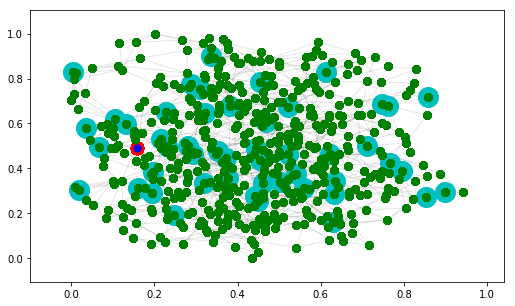

Starting infection


----DONE


In [32]:
#Run the simulation

figureList = list()
# Parameters definition
numRumors = 100
maxThreshold = 1
numMonitors = 50
propagProba = 0.6
numNodes = 500
linkProba = 0.2
monitorTrigger = list()
numStep = 100

j=0

Graph, Pos, rumorSources, monitorsList = generateGraphReady(numNodes,linkProba,maxThreshold,numRumors,numMonitors)
fig1 =  drawColoredGraph(Graph, Pos, numRumors, rumorSources, monitorsList)
#fig1.savefig('./TestFigs/figT'+str(j)+'.png')
print("Starting infection")
infections = [[] for n in range(numRumors)]
infected = getInfectedList(Graph,numRumors)

while(not isAllInfected(Graph,numRumors)):

    Graph = infectionForward(Graph, propagProba, numRumors)
    infected = getInfectedList(Graph,numRumors)
    # j+1 because j=0 is step 1
    monitorTrigger = updateMonitorTrig(j+1,monitorTrigger,monitorsList,Graph,numRumors)
    j += 1
    #fig2 = drawColoredGraph(Graph, Pos, numRumors, rumorSources, myMonitors=monitorsList,myIndex=j)
    
print("----DONE")
monitorTrigger2 = sorted(monitorTrigger, key=lambda x : (x[0], x[2]))

In [33]:
# Find the maximum number of steps :
maxStep = -1
for step in monitorTrigger2:
    if step[2] > maxStep :
        maxStep = step[2]
        
        
# create array for each monitoring node
HistoDict = dict()

#Fill in the array
for monitor in monitorsList :
    HistoDict[monitor] = np.zeros((maxStep+1,1))
    for elem in monitorTrigger2 :
        if monitor == elem[0] :
            HistoDict[monitor][elem[2]] += 1
    HistoDict[monitor] = np.cumsum(HistoDict[monitor])/numRumors

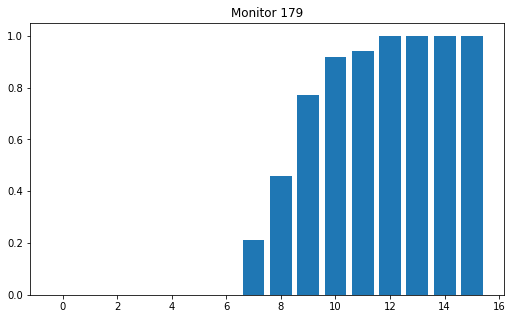

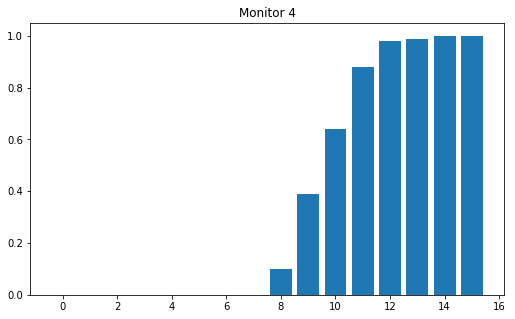

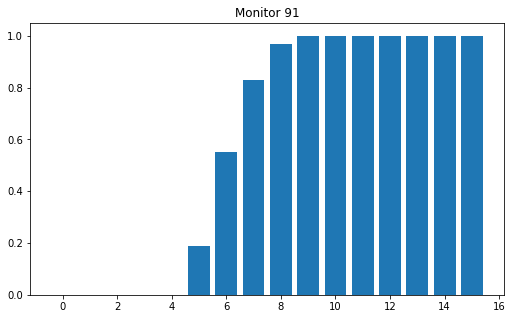

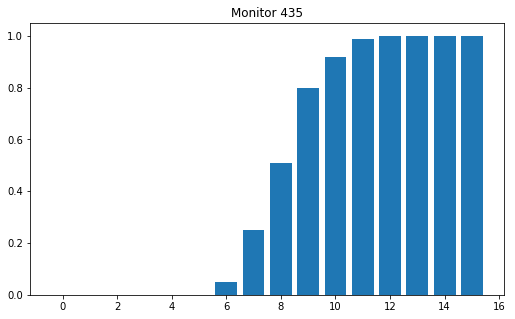

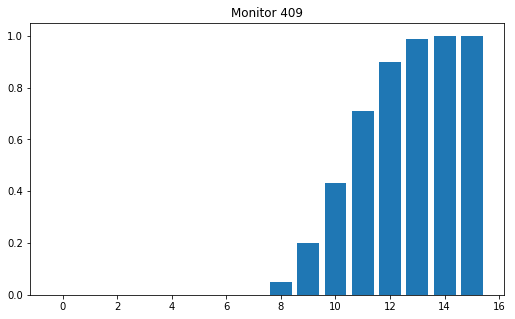

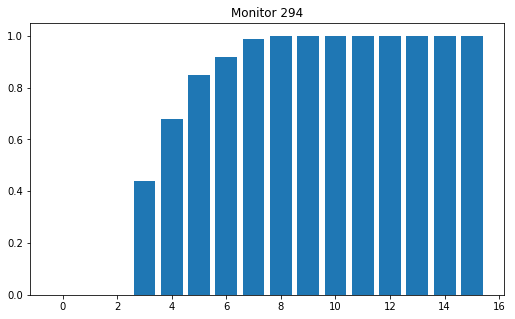

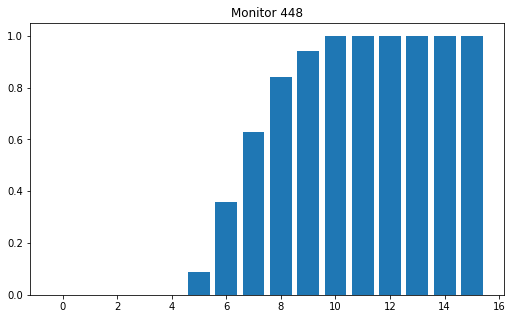

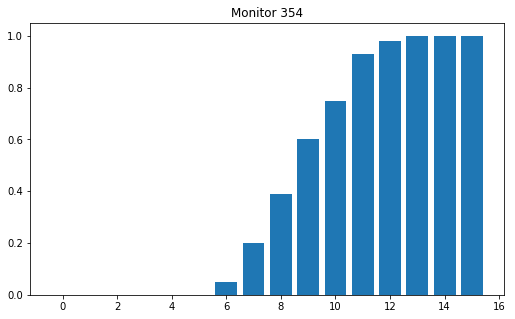

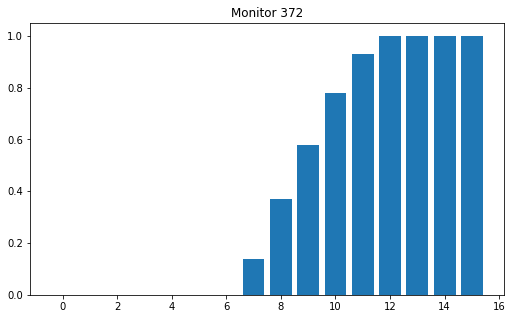

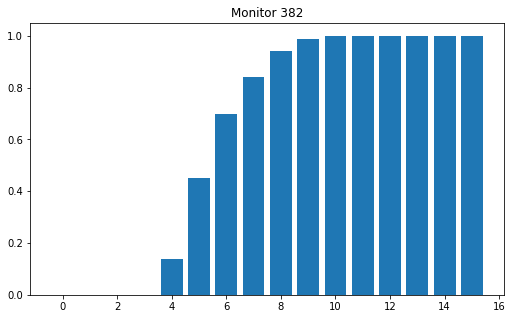

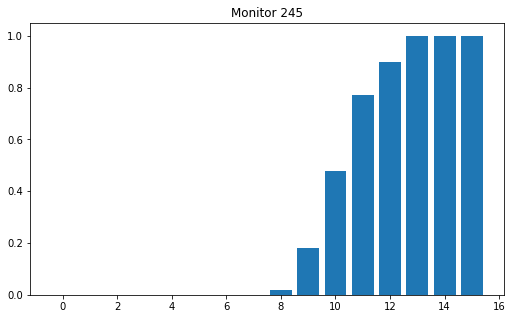

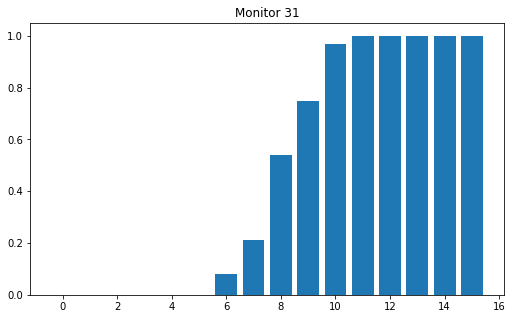

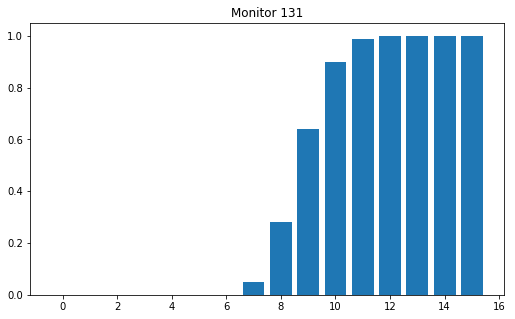

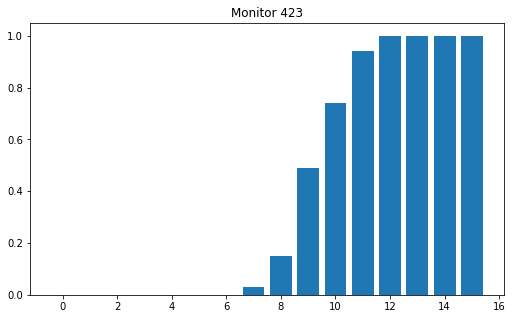

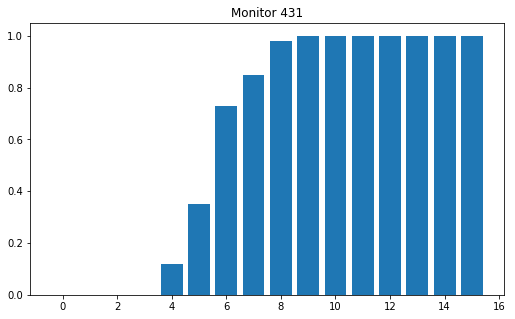

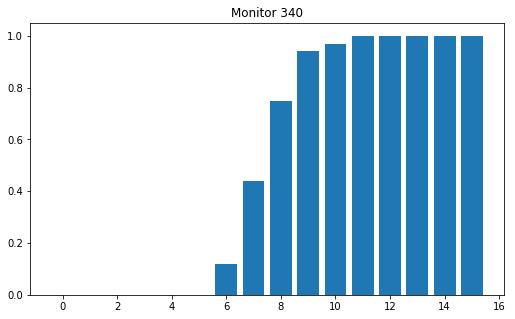

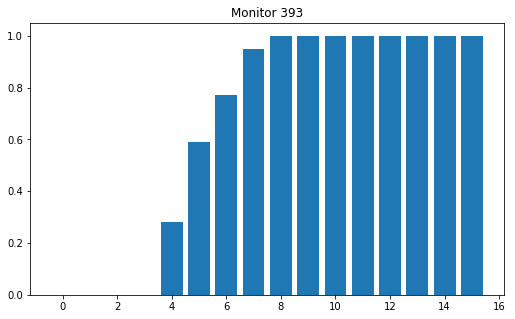

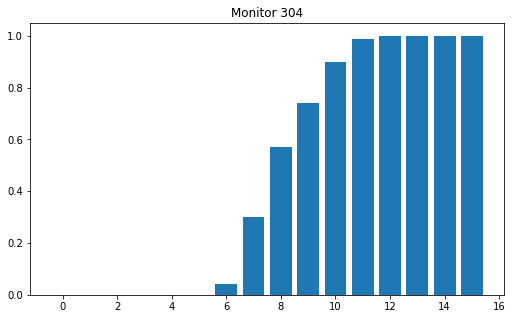

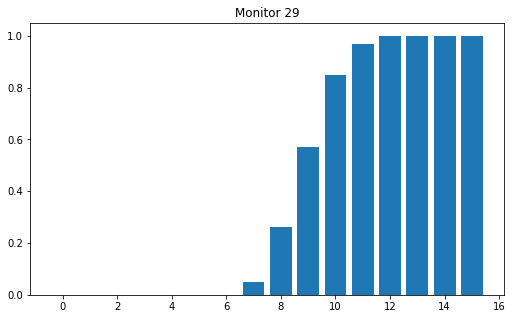

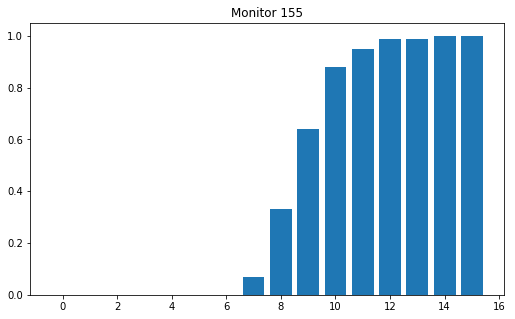

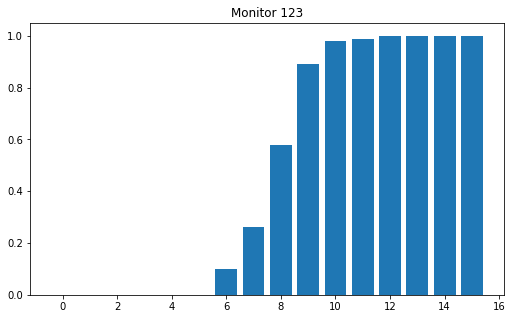

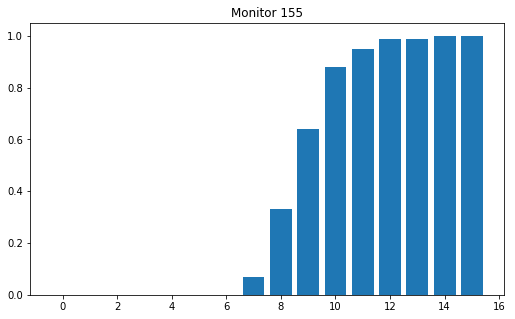

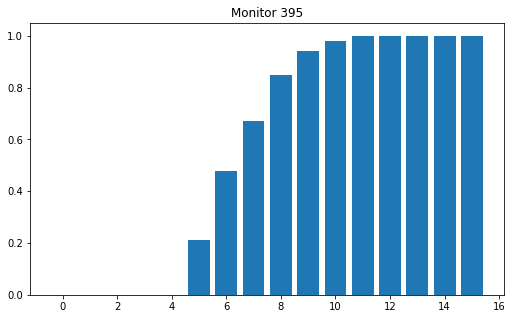

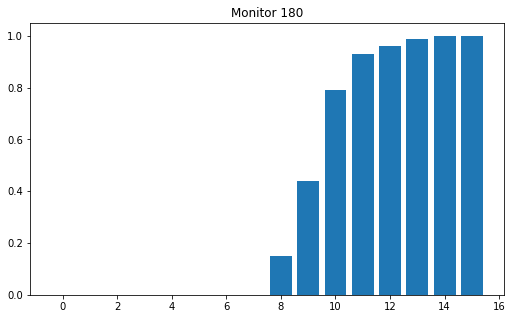

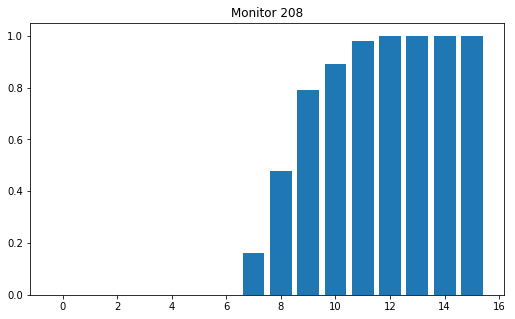

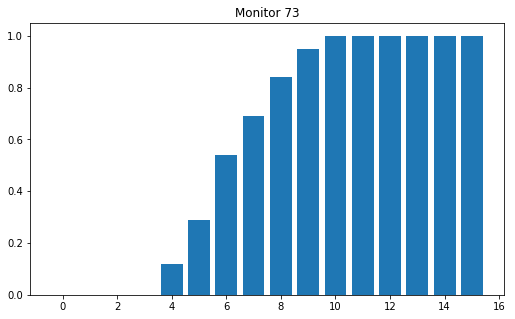

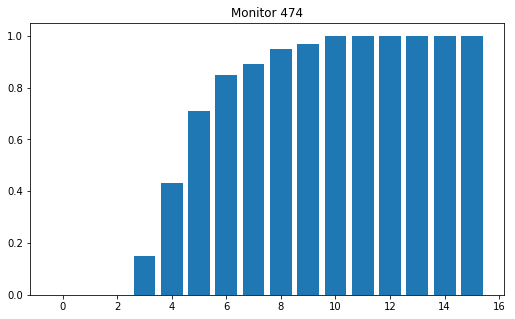

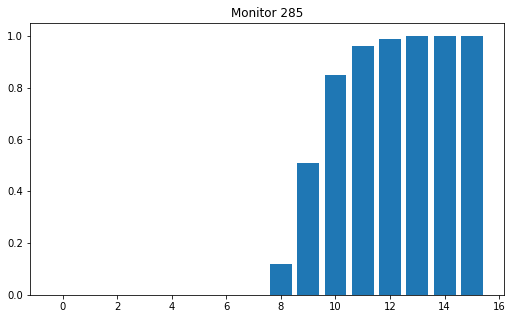

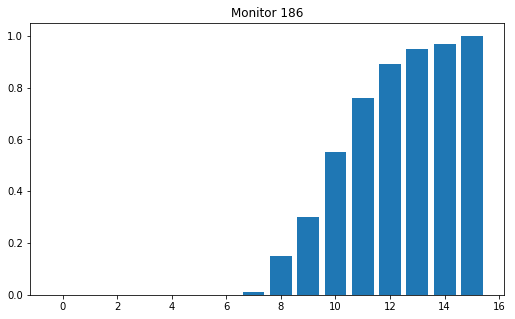

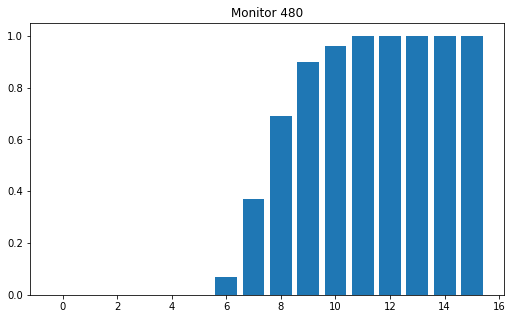

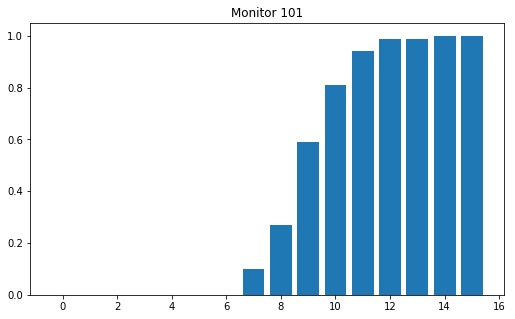

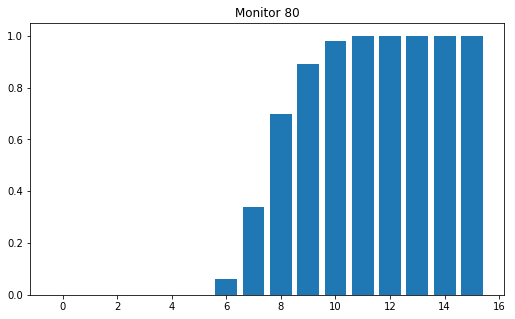

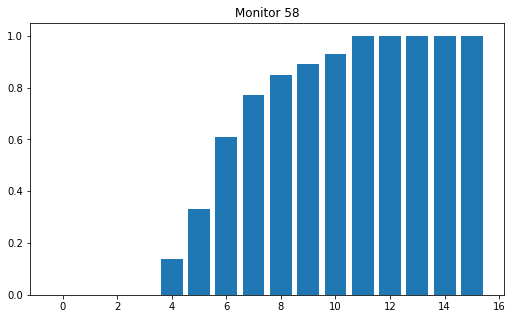

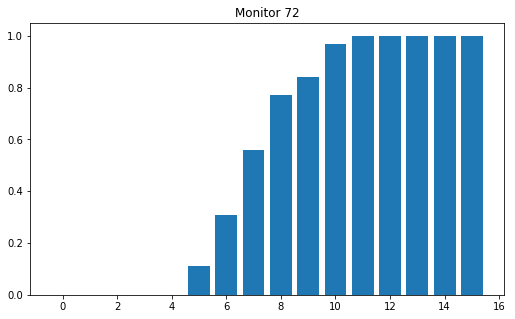

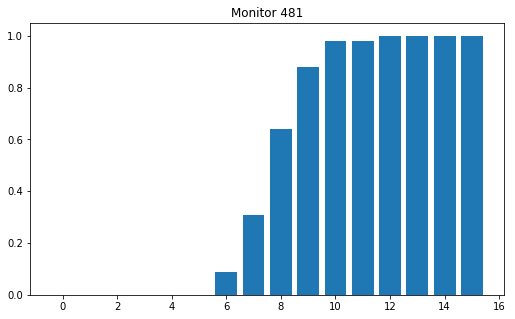

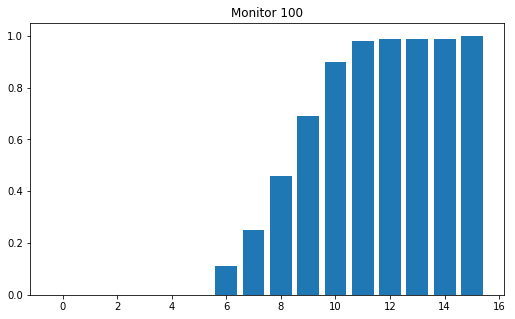

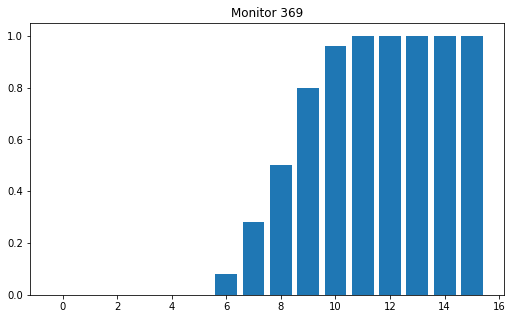

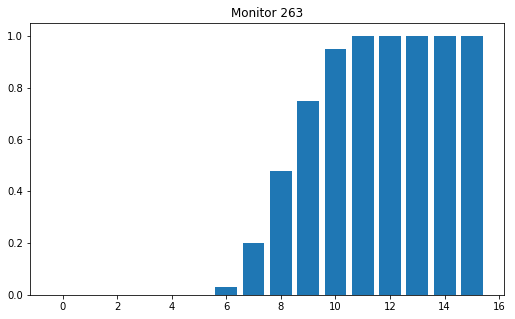

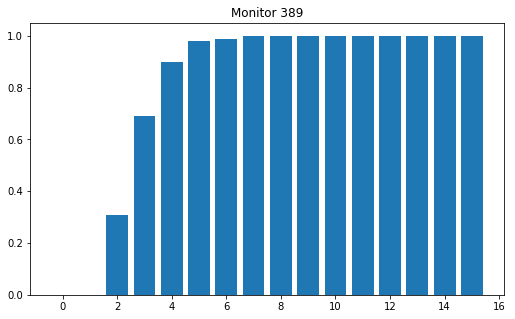

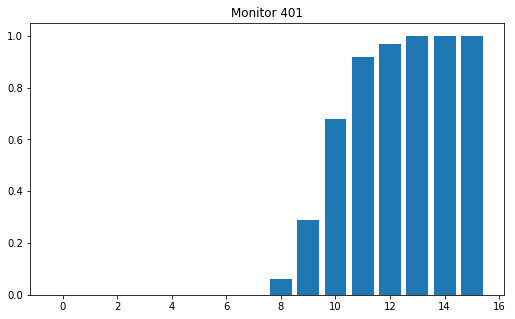

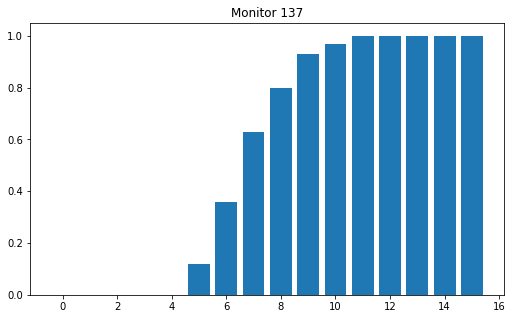

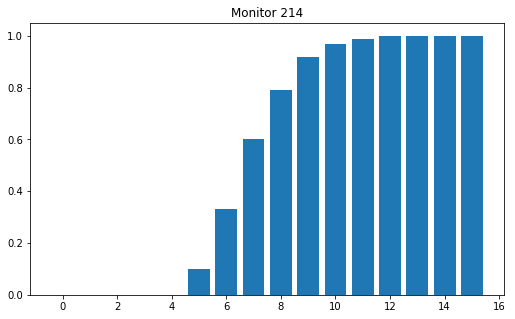

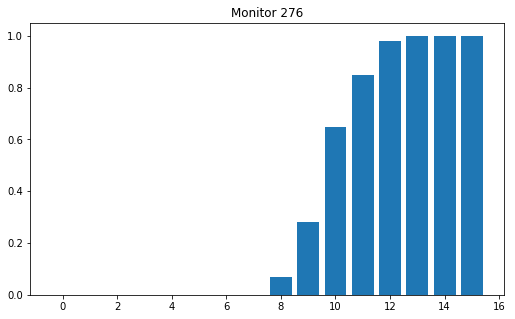

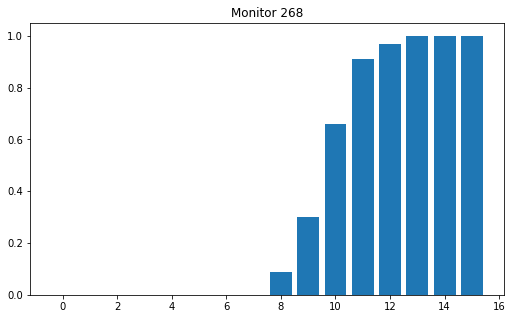

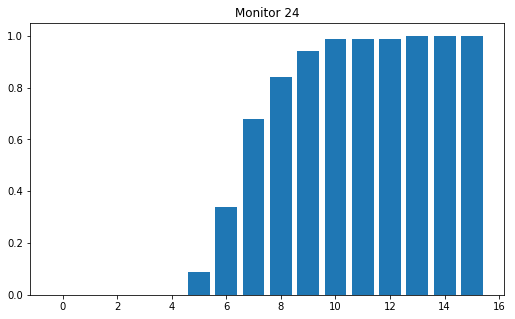

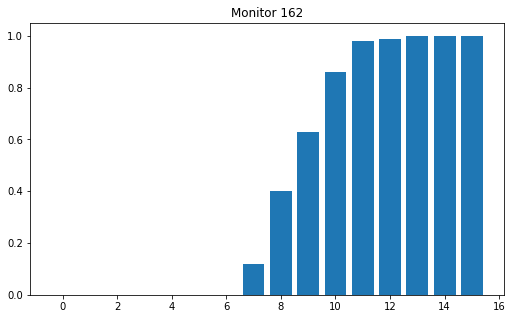

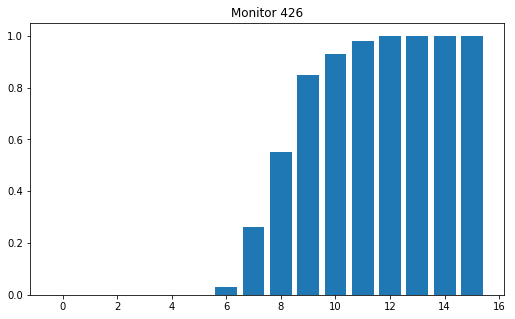

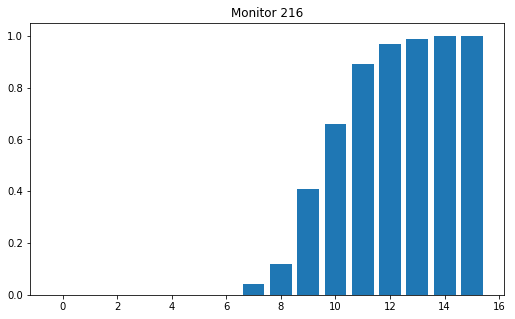

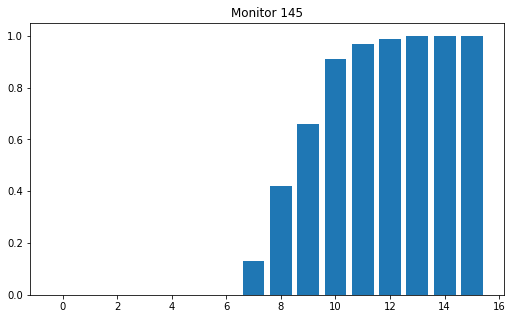

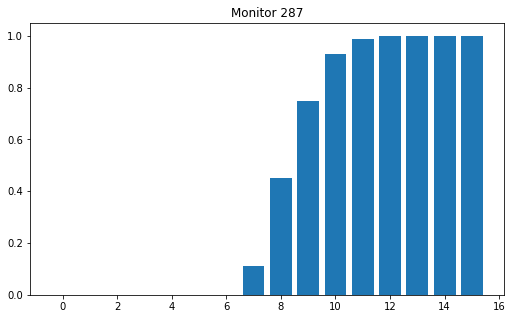

In [34]:
for m in monitorsList :
    plt.bar(range(0,maxStep+1),HistoDict[m])
    plt.title("Monitor "+str(m))
    plt.show()

In [37]:
sourceHisto = {}
monitorToTest = 214#monitorsList[12]

for source in Graph.nodes():
    if source not in monitorsList :
        sourceHisto[source]=np.zeros((maxStep+1,1))
        for i in range(0,maxStep+1):
            sourceHisto[source][i] = calculProba(propagProba,len(nx.shortest_path(Graph,source,monitorToTest))-1,i)

In [38]:
def chiDist(histo1,histo2):

    PmQ2 = np.power(histo1-histo2,2)
    
    #prevent 0 values in division
    histo1[histo1==0]=np.finfo(float).eps
    histo2[histo2==0]=np.finfo(float).eps
    PpQ = histo1 + histo2
    vectRes = np.divide(PmQ2,PpQ)
    res = np.sum(vectRes)
    return np.sqrt(res)


dList = []
dListChi =[]

for i in Graph.nodes():
    if i not in monitorsList:
        #plt.bar(range(0,maxStep+1),sourceHisto[i])
        #plt.show()
        d = np.linalg.norm(sourceHisto[i]-HistoDict[monitorToTest])
        d2 = chiDist(sourceHisto[i],np.transpose(HistoDict[monitorToTest][np.newaxis]))
        dList.append((i,d))
        dListChi.append((i,d2))
        #print("Dist =",d)
        
dListSorted = sorted(dList,key=lambda x : x[1])
dListChiSorted = sorted(dListChi,key=lambda x : x[1])

classement = [ v[0] for v in dListSorted]
classementChi = [ v[0] for v in dListChiSorted]

print("classment de la source (L2) ",classement.index(rumorSources[0]))
print("classment de la source (Chi) ",classementChi.index(rumorSources[0]))

classment de la source (L2)  81
classment de la source (Chi)  52


<Container object of 16 artists>

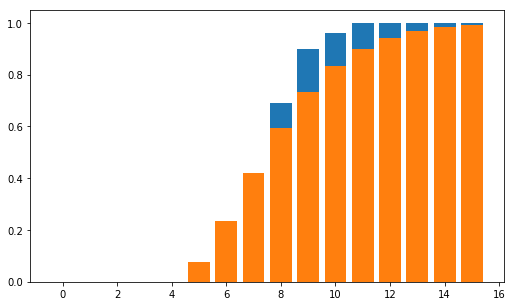

In [49]:
plt.bar(range(0,maxStep+1),HistoDict[480])
plt.bar(range(0,maxStep+1),sourceHisto[387])


In [40]:
rumorSources

[387]

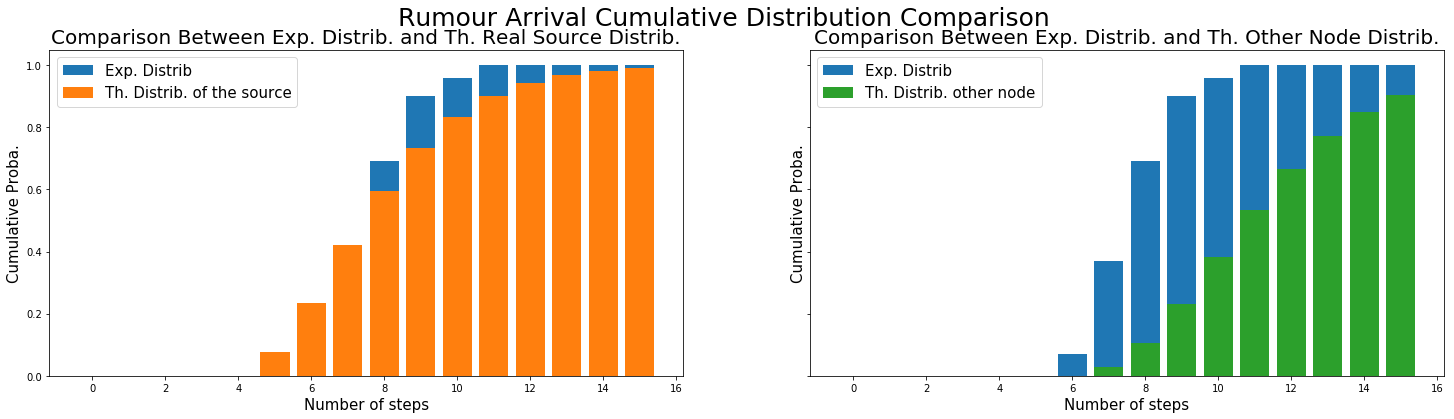

In [107]:
matplotlib.rcParams['figure.figsize'] = (25,6.0)
f, (ax1, ax2) = plt.subplots(1,2, sharey=True)
f.suptitle("Rumour Arrival Cumulative Distribution Comparison",fontsize=25)
ax1.bar(range(0,maxStep+1),HistoDict[480],label='Exp. Distrib')
ax1.bar(range(0,maxStep+1),sourceHisto[387],label='Th. Distrib. of the source')
ax1.set_xlabel('Number of steps',fontsize=15)
ax1.set_ylabel('Cumulative Proba.',fontsize=15)
ax1.legend(loc=2,fontsize=15)
ax1.set_title('Comparison Between Exp. Distrib. and Th. Real Source Distrib.',fontsize=20)
ax2.set_title("Comparison Between Exp. Distrib. and Th. Other Node Distrib.",fontsize=20)
ax2.bar(range(0,maxStep+1),HistoDict[480],label='Exp. Distrib')
ax2.bar(range(0,maxStep+1),sourceHisto[486],color='#2ca02c',label='Th. Distrib. other node')
ax2.set_xlabel('Number of steps',fontsize=15)
ax2.set_ylabel('Cumulative Proba.',fontsize=15)
ax2.legend(loc=2,fontsize=15)
plt.savefig("histoComparison.svg")
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
#f.subplots_adjust(hspace=0)
#plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)